# Payment Date Prediction System

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
from numpy import unique
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
import matplotlib as mt
from matplotlib import style
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 300) # or 1000.
pd. set_option('display.max_rows', 300) # or 1000.



In [2]:
#loading the dataset given 
df = pd.read_csv(r'H2HBABBA2624.csv')
df.shape
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA,2019-04-18 00:00:00,2019.0,1.929060e+09,2019-04-02,20190331,20190402,20190417.0,USD,RV,1.0,NaN,13768.73,20190402.0,NAH4,1.929060e+09,0
1,U013,0140103480,PRIC co,2020-02-14 00:00:00,2020.0,1.991837e+09,2020-01-01,20191230,20200101,20200215.0,USD,RV,1.0,NaN,26433.42,20200101.0,NAVF,1.991837e+09,0
2,U001,0200729942,SA in,2019-05-01 00:00:00,2019.0,1.929150e+09,2019-04-18,20190415,20190418,20190503.0,USD,RV,1.0,NaN,1132.42,20190418.0,NAA8,1.929150e+09,0
3,U001,0200704045,RA co,2020-03-02 00:00:00,2020.0,1.930531e+09,2020-02-14,20200215,20200214,20200229.0,USD,RV,1.0,NaN,2243.97,20200214.0,NAA8,1.930531e+09,0
4,U001,0200769623,WAL-MAR in,2019-07-12 00:00:00,2019.0,1.929542e+09,2019-06-26,20190626,20190626,20190711.0,USD,RV,1.0,NaN,2022.57,20190626.0,NAH4,1.929542e+09,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Removing Null columns

In [4]:
#to find out the total number of missing values
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [5]:
#removing column having all values as null as they do not contribute to the model
#here we are getting rid of the column 'area_business'
df.dropna(how='all',axis=1,inplace=True)
df.shape

(50000, 18)

In [6]:
# as we see that there are 5 null rows in the invoice id out of 50000 entries, we can remove them
df.dropna(subset = ['invoice_id'], how = 'any', inplace = True)

In [7]:
df.shape

(49995, 18)

### Dealing with constant and duplicates

In [8]:
#we can find the total number of unique entries in a given column
print(df.nunique())

business_code                 6
cust_number                1456
name_customer              4231
clear_date                  398
buisness_year                 2
doc_id                    48850
posting_date                505
document_create_date        507
document_create_date.1      505
due_in_date                 546
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         44188
baseline_create_date        503
cust_payment_terms           74
invoice_id                48850
isOpen                        2
dtype: int64


In [9]:
#we can the drop the tables having constant(i.e unique entries=1) and quasi-cosntant (i.e having low unique entries)
df.drop('buisness_year',axis = 1, inplace=True)   
df.drop('invoice_currency',axis = 1, inplace=True)
df.drop('document type',axis = 1, inplace=True)
df.drop('posting_id',axis = 1, inplace=True)

In [10]:
df.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA,2019-04-18 00:00:00,1.929060e+09,2019-04-02,20190331,20190402,20190417.0,13768.73,20190402.0,NAH4,1.929060e+09,0
1,U013,0140103480,PRIC co,2020-02-14 00:00:00,1.991837e+09,2020-01-01,20191230,20200101,20200215.0,26433.42,20200101.0,NAVF,1.991837e+09,0
2,U001,0200729942,SA in,2019-05-01 00:00:00,1.929150e+09,2019-04-18,20190415,20190418,20190503.0,1132.42,20190418.0,NAA8,1.929150e+09,0
3,U001,0200704045,RA co,2020-03-02 00:00:00,1.930531e+09,2020-02-14,20200215,20200214,20200229.0,2243.97,20200214.0,NAA8,1.930531e+09,0
4,U001,0200769623,WAL-MAR in,2019-07-12 00:00:00,1.929542e+09,2019-06-26,20190626,20190626,20190711.0,2022.57,20190626.0,NAH4,1.929542e+09,0


In [11]:
#getting all the duplicated values using inbuilt function
print(df[df.duplicated()])

      business_code cust_number      name_customer           clear_date  \
1331           U001  0200936373           SUPE llc  2019-07-24 00:00:00   
1651           U001  0200706844            WINC in  2020-02-12 00:00:00   
1744           U001  0200762301         C&S WH llc  2019-09-04 00:00:00   
2080           U013  0140102142              M K    2019-04-19 00:00:00   
2382           U001  0200900909         SYSCO corp                  NaN   
...             ...         ...                ...                  ...   
49964          U001  0200965912           C&S W co                  NaN   
49973          U001  0200799367             MCL co  2019-09-09 00:00:00   
49974          U001  0200236583   REQU corporation  2020-02-11 00:00:00   
49981          CA02  0140106231  PRATT corporation  2019-12-27 00:00:00   
49989          U001  0200580232          INTERR us  2019-03-12 00:00:00   

             doc_id posting_date  document_create_date  \
1331   1.929571e+09   2019-07-05         

In [12]:
df.duplicated().sum()

1145

In [13]:
dupli = df[df.duplicated()].index.values
dupli

array([ 1331,  1651,  1744, ..., 49974, 49981, 49989], dtype=int64)

In [14]:
#we drop the duplicate vlues as they do not help the model
df.drop_duplicates(keep='first',inplace=True)
df.shape

(48850, 14)

In [15]:
print(df.nunique())

business_code                 6
cust_number                1456
name_customer              4231
clear_date                  398
doc_id                    48850
posting_date                505
document_create_date        507
document_create_date.1      505
due_in_date                 546
total_open_amount         44188
baseline_create_date        503
cust_payment_terms           74
invoice_id                48850
isOpen                        2
dtype: int64


In [16]:
#confirming that all the duplicate values have been removed
print(df[df.duplicated()])

Empty DataFrame
Columns: [business_code, cust_number, name_customer, clear_date, doc_id, posting_date, document_create_date, document_create_date.1, due_in_date, total_open_amount, baseline_create_date, cust_payment_terms, invoice_id, isOpen]
Index: []


### Datetime Changes

In [17]:
# changing the various data types to datetime for the requied columns
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['posting_date']=pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48850 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           48850 non-null  object        
 1   cust_number             48850 non-null  object        
 2   name_customer           48850 non-null  object        
 3   clear_date              39122 non-null  object        
 4   doc_id                  48850 non-null  float64       
 5   posting_date            48850 non-null  datetime64[ns]
 6   document_create_date    48850 non-null  int64         
 7   document_create_date.1  48850 non-null  int64         
 8   due_in_date             48850 non-null  datetime64[ns]
 9   total_open_amount       48850 non-null  float64       
 10  baseline_create_date    48850 non-null  datetime64[ns]
 11  cust_payment_terms      48850 non-null  object        
 12  invoice_id              48850 non-null  float6

In [19]:
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48850 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           48850 non-null  object        
 1   cust_number             48850 non-null  object        
 2   name_customer           48850 non-null  object        
 3   clear_date              39122 non-null  datetime64[ns]
 4   doc_id                  48850 non-null  float64       
 5   posting_date            48850 non-null  datetime64[ns]
 6   document_create_date    48850 non-null  datetime64[ns]
 7   document_create_date.1  48850 non-null  datetime64[ns]
 8   due_in_date             48850 non-null  datetime64[ns]
 9   total_open_amount       48850 non-null  float64       
 10  baseline_create_date    48850 non-null  datetime64[ns]
 11  cust_payment_terms      48850 non-null  object        
 12  invoice_id              48850 non-null  float6

In [21]:
#we can check for duplicate rows by transposing the dataframe 
dfcopy = df.transpose()
print(dfcopy[dfcopy.duplicated()])

                                      0                    1      \
document_create_date.1  2019-04-02 00:00:00  2020-01-01 00:00:00   
invoice_id                     1929059526.0         1991836677.0   

                                      2                    3      \
document_create_date.1  2019-04-18 00:00:00  2020-02-14 00:00:00   
invoice_id                     1929149589.0         1930530824.0   

                                      4                    5      \
document_create_date.1  2019-06-26 00:00:00  2020-01-29 00:00:00   
invoice_id                     1929542449.0         1930452676.0   

                                      6                    7      \
document_create_date.1  2020-03-27 00:00:00  2019-12-04 00:00:00   
invoice_id                     1930708920.0         1930253692.0   

                                      8                    9      \
document_create_date.1  2020-03-26 00:00:00  2020-03-11 00:00:00   
invoice_id                     2960624354.0 

In [22]:
#here we can see that invoice_id and document_create_date.1 have duplicate values
#dropping the duplicate rows
dfcopy.drop_duplicates(keep='first',inplace=True)
dfcopy.shape

(12, 48850)

In [23]:
#reverting back the changes to the original df
df = dfcopy.transpose()

In [24]:
df.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200759878,SA,2019-04-18,1929059526.0,2019-04-02,2019-03-31,2019-04-17,13768.73,2019-04-02,NAH4,0
1,U013,0140103480,PRIC co,2020-02-14,1991836677.0,2020-01-01,2019-12-30,2020-02-15,26433.42,2020-01-01,NAVF,0
2,U001,0200729942,SA in,2019-05-01,1929149589.0,2019-04-18,2019-04-15,2019-05-03,1132.42,2019-04-18,NAA8,0
3,U001,0200704045,RA co,2020-03-02,1930530824.0,2020-02-14,2020-02-15,2020-02-29,2243.97,2020-02-14,NAA8,0
4,U001,0200769623,WAL-MAR in,2019-07-12,1929542449.0,2019-06-26,2019-06-26,2019-07-11,2022.57,2019-06-26,NAH4,0


In [25]:
#To compare the correlatio between basline_create_date and posting_date
#we convert the posting date from datetime to integer using lambda function
df['posting_date'] = df['posting_date'].apply(lambda x: x.value)

In [26]:
#doing the same for baseline_create_date
df['baseline_create_date'] = df['baseline_create_date'].apply(lambda x: x.value)

In [27]:
df[['baseline_create_date','posting_date']].corr()

,baseline_create_date,posting_date
baseline_create_date,1.000000,0.999881
posting_date,0.999881,1.000000


In [28]:
#as we see they are 99% similar we can drop any one, we choose baseline_create_date
df.drop('baseline_create_date',axis=1,inplace=True)

In [29]:
#changing posting_Date back to datetime from int
df['posting_date'] = df['posting_date'].apply(pd.Timestamp)

In [30]:
df.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,U001,0200759878,SA,2019-04-18,1929059526.0,2019-04-02,2019-03-31,2019-04-17,13768.73,NAH4,0
1,U013,0140103480,PRIC co,2020-02-14,1991836677.0,2020-01-01,2019-12-30,2020-02-15,26433.42,NAVF,0
2,U001,0200729942,SA in,2019-05-01,1929149589.0,2019-04-18,2019-04-15,2019-05-03,1132.42,NAA8,0
3,U001,0200704045,RA co,2020-03-02,1930530824.0,2020-02-14,2020-02-15,2020-02-29,2243.97,NAA8,0
4,U001,0200769623,WAL-MAR in,2019-07-12,1929542449.0,2019-06-26,2019-06-26,2019-07-11,2022.57,NAH4,0


#### Data cleaning and Preprocessing is complete

## Splitting data into train and test

In [31]:
#we split our data based on the null values in the clear_Date column
#for train we take the values that have values and test that have null in the create_date column
train = df[df['clear_date'].notnull()].copy()

In [32]:
train.shape

(39122, 11)

In [33]:
train.isnull().sum()

business_code           0
cust_number             0
name_customer           0
clear_date              0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount       0
cust_payment_terms      0
isOpen                  0
dtype: int64

In [34]:
#getting the test dataset
test = df[df['clear_date'].isnull()].copy()

In [35]:
test.shape

(9728, 11)

In [36]:
#saving them for future use
test.to_csv('main_test.csv')
train.to_csv('main_train.csv')

#### Setting the target variable

In [37]:
#We can the set the target variable as the differnce bwtween the due_in_date and clear_Date
#this gives us the delay in the clearing of payments
train['delay'] = train['clear_date'] - train['due_in_date']
#extracting the no of days to have int64 values
train['delay'] = (train['delay']).dt.days

In [38]:
train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,0200759878,SA,2019-04-18,1929059526.0,2019-04-02,2019-03-31,2019-04-17,13768.73,NAH4,0,1
1,U013,0140103480,PRIC co,2020-02-14,1991836677.0,2020-01-01,2019-12-30,2020-02-15,26433.42,NAVF,0,-1
2,U001,0200729942,SA in,2019-05-01,1929149589.0,2019-04-18,2019-04-15,2019-05-03,1132.42,NAA8,0,-2
3,U001,0200704045,RA co,2020-03-02,1930530824.0,2020-02-14,2020-02-15,2020-02-29,2243.97,NAA8,0,2
4,U001,0200769623,WAL-MAR in,2019-07-12,1929542449.0,2019-06-26,2019-06-26,2019-07-11,2022.57,NAH4,0,1


In [39]:
# Sort the data in ascending order based on the posting Date Column
#this helps us to restrict newer entries into the training dataset 
train = train.sort_values(by='posting_date')

In [40]:
train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,delay
14501,U001,CCCA02,KRAFT associates,2019-03-01,1928536678.0,2018-12-30,2018-12-31,2019-02-03,20193.56,NAG2,0,26
3393,U001,0200769623,WAL-MAR,2019-01-09,1928536196.0,2018-12-30,2018-12-29,2019-01-14,53394.13,NAH4,0,-5
8817,U001,0200769623,WAL-MAR co,2019-01-09,1928537874.0,2018-12-30,2018-12-29,2019-01-14,5491.15,NAH4,0,-5
19678,U001,0200769623,WAL-MAR corporation,2019-01-09,1928540652.0,2018-12-30,2018-12-29,2019-01-14,14599.04,NAH4,0,-5
46567,U001,0200769623,WAL-MAR in,2019-01-09,1928539936.0,2018-12-30,2018-12-29,2019-01-14,678.22,NAH4,0,-5


#### Splitting the training set into train,test and validation

In [41]:
x = train.drop('delay',axis=1)

#target value 
y = train['delay']

In [42]:
#splitting the data preliminarily into 70/30 split 
X_train,X_inter_test,y_train,y_inter_test = train_test_split(x,y,test_size=0.3,random_state=0 , shuffle = False)

In [43]:
#now we split the intermediate test set into final test and validation on a 50/50 split
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [44]:
X_train.shape , X_val.shape , X_test.shape

((27385, 11), (5868, 11), (5869, 11))

## Exploratory Data Analysis

<AxesSubplot:xlabel='delay', ylabel='Density'>

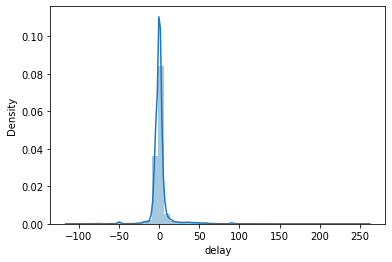

In [45]:
#getting an idea about the target variable 'delay'
sns.distplot(y_train)

#### We conclude the distribution is right skewed

In [46]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,delay
0,14501,U001,CCCA02,KRAFT associates,2019-03-01,1928536678.0,2018-12-30,2018-12-31,2019-02-03,20193.56,NAG2,0,26
1,3393,U001,0200769623,WAL-MAR,2019-01-09,1928536196.0,2018-12-30,2018-12-29,2019-01-14,53394.13,NAH4,0,-5
2,8817,U001,0200769623,WAL-MAR co,2019-01-09,1928537874.0,2018-12-30,2018-12-29,2019-01-14,5491.15,NAH4,0,-5
3,19678,U001,0200769623,WAL-MAR corporation,2019-01-09,1928540652.0,2018-12-30,2018-12-29,2019-01-14,14599.04,NAH4,0,-5
4,46567,U001,0200769623,WAL-MAR in,2019-01-09,1928539936.0,2018-12-30,2018-12-29,2019-01-14,678.22,NAH4,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27380,26867,U001,0200769623,WAL-MAR co,2019-10-21,1929976282.0,2019-10-08,2019-10-07,2019-10-23,68077.46,NAH4,0,-2
27381,9830,U001,0200769623,WAL-MAR llc,2019-10-24,1929982679.0,2019-10-08,2019-10-08,2019-10-23,10736.41,NAH4,0,1
27382,14127,U001,0200769623,WAL-MAR foundation,2019-10-24,1929981935.0,2019-10-08,2019-10-07,2019-10-23,7341.48,NAH4,0,1
27383,16072,U001,0200799342,MITCH us,2019-10-23,1929984304.0,2019-10-08,2019-10-08,2019-10-23,6755.46,NAA8,0,0


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27385 entries, 14501 to 37355
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27385 non-null  object        
 1   cust_number           27385 non-null  object        
 2   name_customer         27385 non-null  object        
 3   clear_date            27385 non-null  datetime64[ns]
 4   doc_id                27385 non-null  object        
 5   posting_date          27385 non-null  datetime64[ns]
 6   document_create_date  27385 non-null  datetime64[ns]
 7   due_in_date           27385 non-null  datetime64[ns]
 8   total_open_amount     27385 non-null  object        
 9   cust_payment_terms    27385 non-null  object        
 10  isOpen                27385 non-null  object        
dtypes: datetime64[ns](4), object(7)
memory usage: 2.5+ MB


In [48]:
#now we look for the columns having low unique values
X_train.nunique()

business_code               6
cust_number              1261
name_customer            3382
clear_date                280
doc_id                  27385
posting_date              283
document_create_date      288
due_in_date               342
total_open_amount       25079
cust_payment_terms         63
isOpen                      1
dtype: int64

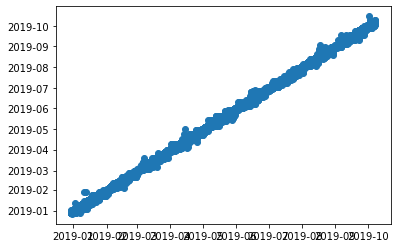

In [49]:
plt.plot_date(X_train['posting_date'],X_train['document_create_date'])

In [50]:
X_train.drop(['isOpen'], axis=1, inplace = True)
X_val.drop(['isOpen'], axis=1, inplace = True)
X_test.drop(['isOpen'], axis=1, inplace = True)

In [51]:
#we can drop the clear_date column as we have derived the target variable from it and it is no longer required
X_train.drop(['clear_date'], axis=1, inplace = True)
X_val.drop(['clear_date'], axis=1, inplace = True)
X_test.drop(['clear_date'], axis=1, inplace = True)

In [52]:
X_train.drop(['document_create_date'], axis=1, inplace = True)
X_val.drop(['document_create_date'], axis=1, inplace = True)     #clear_date has to be predicted so dropping
X_test.drop(['document_create_date'], axis=1, inplace = True)

In [53]:
X_train.shape , X_val.shape , X_test.shape

((27385, 8), (5868, 8), (5869, 8))

<AxesSubplot:>

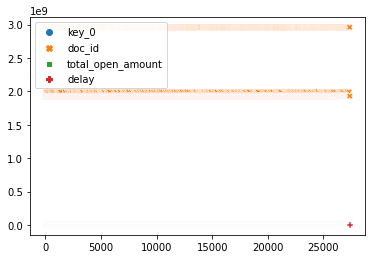

In [54]:
#No direct trend
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index),)

### Feature engineering to change the various datatypes to int/float

In [55]:
X_train["total_open_amount"] = X_train["total_open_amount"].astype(float)
X_val["total_open_amount"] = X_val["total_open_amount"].astype(float)
X_test["total_open_amount"] = X_test["total_open_amount"].astype(float)

In [56]:
X_train.head()

,business_code,cust_number,name_customer,doc_id,posting_date,due_in_date,total_open_amount,cust_payment_terms
14501,U001,CCCA02,KRAFT associates,1928536678.0,2018-12-30,2019-02-03,20193.56,NAG2
3393,U001,0200769623,WAL-MAR,1928536196.0,2018-12-30,2019-01-14,53394.13,NAH4
8817,U001,0200769623,WAL-MAR co,1928537874.0,2018-12-30,2019-01-14,5491.15,NAH4
19678,U001,0200769623,WAL-MAR corporation,1928540652.0,2018-12-30,2019-01-14,14599.04,NAH4
46567,U001,0200769623,WAL-MAR in,1928539936.0,2018-12-30,2019-01-14,678.22,NAH4


In [57]:
#converting the doc_id to float
X_train["doc_id"] = X_train["doc_id"].astype(float)
X_val["doc_id"] = X_val["doc_id"].astype(float)
X_test["doc_id"] = X_test["doc_id"].astype(float)

In [58]:
#converting the cust_number to string and then float
X_train['cust_number'] = X_train['cust_number'].str.replace(r'[^\d.]+', '')
X_val['cust_number'] =  X_val['cust_number'].str.replace(r'[^\d.]+', '')
X_test['cust_number'] =  X_test['cust_number'].str.replace(r'[^\d.]+', '')

In [59]:
X_train["cust_number"] = X_train["cust_number"].astype(float)
X_val["cust_number"] = X_val["cust_number"].astype(float)
X_test["cust_number"] = X_test["cust_number"].astype(float)

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27385 entries, 14501 to 37355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       27385 non-null  object        
 1   cust_number         27385 non-null  float64       
 2   name_customer       27385 non-null  object        
 3   doc_id              27385 non-null  float64       
 4   posting_date        27385 non-null  datetime64[ns]
 5   due_in_date         27385 non-null  datetime64[ns]
 6   total_open_amount   27385 non-null  float64       
 7   cust_payment_terms  27385 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 1.9+ MB


#### Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
#encoding business_code
my_enc = LabelEncoder()

In [63]:
X_train['business_ecode'] = my_enc.fit_transform(X_train['business_code'])
X_val['business_ecode'] = my_enc.fit_transform(X_val['business_code'])
X_test['business_ecode'] = my_enc.fit_transform(X_test['business_code'])


In [64]:
#now we drop the original column as it is label encoded
X_train.drop(['business_code'],inplace=True,axis=1)
X_val.drop(['business_code'],inplace=True,axis=1)
X_test.drop(['business_code'],inplace=True,axis=1)

In [65]:
#encoder for cust_payment_terms
pay_enc = LabelEncoder()

In [66]:
X_train['pay_enc']=pay_enc.fit_transform(X_train['cust_payment_terms'])
X_val['pay_enc']=pay_enc.fit_transform(X_val['cust_payment_terms'])
X_test['pay_enc']=pay_enc.fit_transform(X_test['cust_payment_terms'])

In [67]:
#dropping cust payment terms
X_train.drop(['cust_payment_terms'], axis=1, inplace = True)
X_val.drop(['cust_payment_terms'], axis=1, inplace = True)
X_test.drop(['cust_payment_terms'], axis=1, inplace = True)

In [68]:
#encoding customer names
name_enc = LabelEncoder()

In [69]:
X_train['name_enc']=name_enc.fit_transform(X_train['name_customer'])
X_val['name_enc']=name_enc.fit_transform(X_val['name_customer'])
X_test['name_enc']=name_enc.fit_transform(X_test['name_customer'])

In [70]:
#dropping the original column name_customer 
X_train.drop(['name_customer'],inplace=True,axis=1)
X_val.drop(['name_customer'],inplace=True,axis=1)
X_test.drop(['name_customer'],inplace=True,axis=1)

In [71]:
X_train.dtypes

cust_number                 float64
doc_id                      float64
posting_date         datetime64[ns]
due_in_date          datetime64[ns]
total_open_amount           float64
business_ecode                int32
pay_enc                       int32
name_enc                      int32
dtype: object

##### Encoding of all the datetime

In [72]:
#encoding of the posting date
X_train['posting_year']=X_train['posting_date'].dt.year
X_val['posting_year']=X_val['posting_date'].dt.year
X_test['posting_year']=X_test['posting_date'].dt.year

X_train['posting_month']=X_train['posting_date'].dt.month
X_val['posting_month']=X_val['posting_date'].dt.month
X_test['posting_month']=X_test['posting_date'].dt.month

X_train['posting_day']=X_train['posting_date'].dt.day
X_val['posting_day']=X_val['posting_date'].dt.day
X_test['posting_day']=X_test['posting_date'].dt.day

X_train['posting_wday']=X_train['posting_date'].dt.weekday
X_val['posting_wday']=X_val['posting_date'].dt.weekday
X_test['posting_wday']=X_test['posting_date'].dt.weekday




In [73]:
#dropping the original column of posting_date
X_train.drop('posting_date',axis=1,inplace=True)
X_val.drop('posting_date',axis=1,inplace=True)
X_test.drop('posting_date',axis=1,inplace=True)


In [74]:
#Label encoding of the column due_in_date
X_train['due_year']=X_train['due_in_date'].dt.year
X_val['due_year']=X_val['due_in_date'].dt.year
X_test['due_year']=X_test['due_in_date'].dt.year

X_train['due_month']=X_train['due_in_date'].dt.month
X_val['due_month']=X_val['due_in_date'].dt.month
X_test['due_month']=X_test['due_in_date'].dt.month


X_train['due_day']=X_train['due_in_date'].dt.day
X_val['due_day']=X_val['due_in_date'].dt.day
X_test['due_day']=X_test['due_in_date'].dt.day

X_train['due_wday']=X_train['due_in_date'].dt.weekday
X_val['due_wday']=X_val['due_in_date'].dt.weekday
X_test['due_wday']=X_test['due_in_date'].dt.weekday

In [75]:
#dropping the original column of posting_date
X_train.drop('due_in_date',axis=1,inplace=True)
X_val.drop('due_in_date',axis=1,inplace=True)
X_test.drop('due_in_date',axis=1,inplace=True)


In [76]:
X_train

,cust_number,doc_id,total_open_amount,business_ecode,pay_enc,name_enc,posting_year,posting_month,posting_day,posting_wday,due_year,due_month,due_day,due_wday
14501,2.0,1.928537e+09,20193.56,1,28,1659,2018,12,30,6,2019,2,3,6
3393,200769623.0,1.928536e+09,53394.13,1,30,3267,2018,12,30,6,2019,1,14,0
8817,200769623.0,1.928538e+09,5491.15,1,30,3269,2018,12,30,6,2019,1,14,0
19678,200769623.0,1.928541e+09,14599.04,1,30,3271,2018,12,30,6,2019,1,14,0
46567,200769623.0,1.928540e+09,678.22,1,30,3273,2018,12,30,6,2019,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26867,200769623.0,1.929976e+09,68077.46,1,30,3269,2019,10,8,1,2019,10,23,2
9830,200769623.0,1.929983e+09,10736.41,1,30,3274,2019,10,8,1,2019,10,23,2
14127,200769623.0,1.929982e+09,7341.48,1,30,3272,2019,10,8,1,2019,10,23,2
16072,200799342.0,1.929984e+09,6755.46,1,18,2096,2019,10,8,1,2019,10,23,2


## Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation'}>

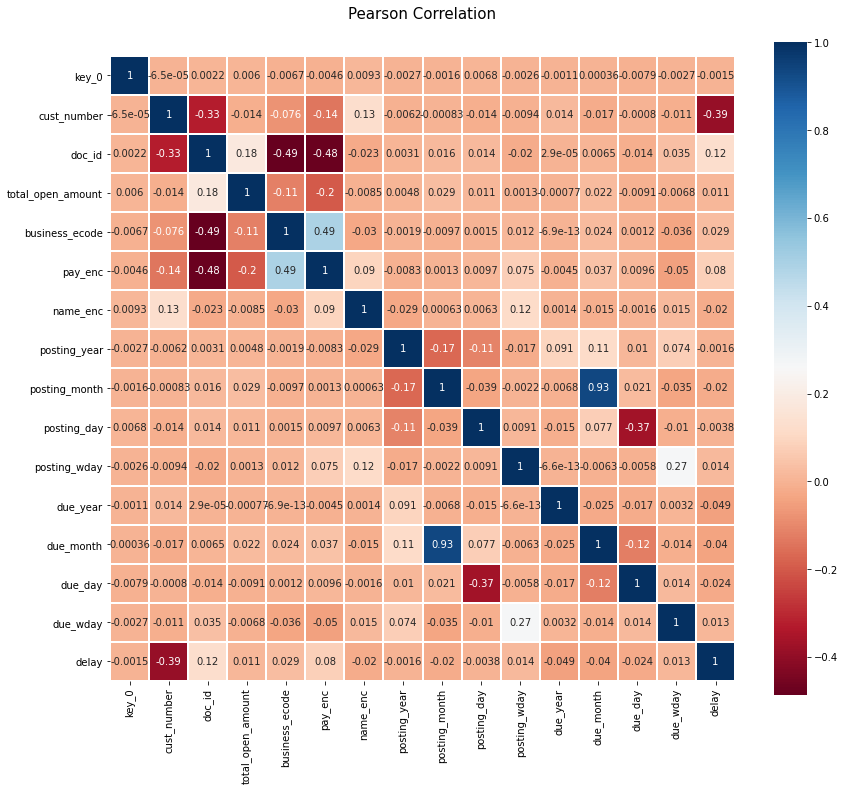

In [77]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [78]:
#As feature engineering has been done we can apply the variance threshold
sel = VarianceThreshold(0.7)
sel.fit(X_train)

VarianceThreshold(threshold=0.7)

In [79]:
sel.variances_

array([1.88301711e+15, 7.56186762e+16, 1.52715581e+09, 3.11492302e-01,
       1.16376259e+02, 1.27874668e+06, 4.43514664e-03, 7.06069053e+00,
       7.87750113e+01, 3.28368063e+00, 1.46065364e-04, 7.18362777e+00,
       7.39491282e+01, 3.52585106e+00])

## Modeling 

### Checking with linear Regression

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [81]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_predict = base_model.predict(X_val)

In [83]:
from sklearn.metrics import mean_squared_error
#mean squared error value

mean_squared_error(y_val, y_predict, squared=True)

37.24530616701339

In [84]:
import math
#root mean squared error value
mean_squared_error(y_val, y_predict, squared=False)

6.102893261971193

In [85]:
predict1=[round(value) for value in y_predict]

In [86]:
accuracy=accuracy_score(y_val,predict1)
print("Accuracy: %.2f%%"%(accuracy*100.0))

Accuracy: 3.54%


### Checking with RandomForest

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

In [88]:
#Mean squared error value
mean_squared_error(y_val, predicted, squared=True)

68.01820324085908

In [89]:
#Root mean squared error value
mean_squared_error(y_val, predicted,squared=False)   

8.247314910979153

In [90]:
predictions=[round(value) for value in predicted]

In [91]:
#To check the accuracy of the chosen model
accuracy=accuracy_score(y_val,predictions)
print("Accuracy: %.2f%%"%(accuracy*100.0))

Accuracy: 6.36%


### Checking with xgboost

In [92]:
#Checking XGB Regressor model
import xgboost as xgb
clf1 = xgb.XGBRegressor()
clf1.fit(X_train, y_train)

# Predicting the Test result
predicted1 = clf1.predict(X_val)

In [93]:
#Mean squared error value
mean_squared_error(y_val, predicted1, squared=True)

61.47423750165741

In [94]:
#Root mean squared error value
mean_squared_error(y_val, predicted1,squared=False)   

7.840550841723903

In [95]:
predictionx=[round(value) for value in predicted1]

In [96]:
#Accuracy of the chosen model
accuracy=accuracy_score(y_val,predictionx)
print("Accuracy: %.2f%%"%(accuracy*100.0))

Accuracy: 6.46%


#### We choose RandomForest as max accuracy among the compared models

#### Predicting the delay on the intermediate test set

In [97]:
X_test.shape

(5869, 14)

In [98]:
#Predicitng the delay for the intermediate test set
y_predict_test = clf.predict(X_test)

In [99]:
xtest_predict=pd.Series(y_predict_test,name='Pred_delay')

In [100]:
xtest_predict=xtest_predict.astype('int')

In [101]:
X_test.shape,xtest_predict.shape

((5869, 14), (5869,))

In [102]:
#Resetting index
X_test.reset_index(drop=True,inplace=True)

In [103]:
X_test = X_test.merge(xtest_predict , on = X_test.index)
X_test

,key_0,cust_number,doc_id,total_open_amount,business_ecode,pay_enc,name_enc,posting_year,posting_month,posting_day,posting_wday,due_year,due_month,due_day,due_wday,Pred_delay
0,0,200769623.0,1.930251e+09,45136.86,1,27,1463,2019,12,9,0,2019,12,24,1,-5
1,1,200797452.0,1.930255e+09,40381.61,1,14,1405,2019,12,9,0,2019,12,24,1,3
2,2,200769623.0,1.930250e+09,3612.31,1,27,1458,2019,12,9,0,2019,12,24,1,-6
3,3,100031704.0,1.930249e+09,76349.53,1,14,339,2019,12,9,0,2019,12,24,1,6
4,4,200707822.0,1.930254e+09,4257.24,1,14,1046,2019,12,9,0,2019,12,24,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,5864,200794332.0,1.930576e+09,4063.66,1,16,279,2020,2,27,3,2020,3,13,4,0
5865,5865,200759878.0,1.930577e+09,13750.69,1,27,1119,2020,2,27,3,2020,3,13,4,0
5866,5866,100049079.0,1.930556e+09,14271.00,1,14,401,2020,2,27,3,2020,3,13,4,2
5867,5867,200763489.0,1.930575e+09,27181.61,1,14,470,2020,2,27,3,2020,3,13,4,-1


#### Predicting the delay for the test set

In [104]:
cols=["due_year","due_month","due_day"]
X_test['due_date'] = X_test[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [105]:
X_test['due_date']=pd.to_datetime(X_test['due_date'])

In [106]:
from datetime import date, timedelta

In [107]:
temp = X_test['Pred_delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
X_test['clear_date'] = X_test['due_date'] + temp

In [108]:
X_test

,key_0,cust_number,doc_id,total_open_amount,business_ecode,pay_enc,name_enc,posting_year,posting_month,posting_day,posting_wday,due_year,due_month,due_day,due_wday,Pred_delay,due_date,clear_date
0,0,200769623.0,1.930251e+09,45136.86,1,27,1463,2019,12,9,0,2019,12,24,1,-5,2019-12-24,2019-12-19
1,1,200797452.0,1.930255e+09,40381.61,1,14,1405,2019,12,9,0,2019,12,24,1,3,2019-12-24,2019-12-27
2,2,200769623.0,1.930250e+09,3612.31,1,27,1458,2019,12,9,0,2019,12,24,1,-6,2019-12-24,2019-12-18
3,3,100031704.0,1.930249e+09,76349.53,1,14,339,2019,12,9,0,2019,12,24,1,6,2019-12-24,2019-12-30
4,4,200707822.0,1.930254e+09,4257.24,1,14,1046,2019,12,9,0,2019,12,24,1,-1,2019-12-24,2019-12-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,5864,200794332.0,1.930576e+09,4063.66,1,16,279,2020,2,27,3,2020,3,13,4,0,2020-03-13,2020-03-13
5865,5865,200759878.0,1.930577e+09,13750.69,1,27,1119,2020,2,27,3,2020,3,13,4,0,2020-03-13,2020-03-13
5866,5866,100049079.0,1.930556e+09,14271.00,1,14,401,2020,2,27,3,2020,3,13,4,2,2020-03-13,2020-03-15
5867,5867,200763489.0,1.930575e+09,27181.61,1,14,470,2020,2,27,3,2020,3,13,4,-1,2020-03-13,2020-03-12


### Working on the main test

#### We need to repeat all the steps: Preprocessing,feature engineering, label encoding

In [109]:
test

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
6,U001,0200744019,TARG corp,NaT,1930708920.0,2020-03-27,2020-03-26,2020-04-11,29869.2,NAA8,1
8,CA02,0140104409,LOB llc,NaT,2960624354.0,2020-03-26,2020-03-26,2020-04-13,84254.42,CA10,1
9,U001,0200759878,SA foundation,NaT,1930623250.0,2020-03-11,2020-03-09,2020-03-26,11780.85,NAH4,1
10,U001,0200729942,SA corp,NaT,1930735388.0,2020-04-02,2020-04-02,2020-06-06,31173.36,NAGD,1
15,U001,0200881076,ALBERT,NaT,1930747466.0,2020-04-05,2020-04-04,2020-04-20,35618.61,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...
49985,U001,0200407025,ALBERT in,NaT,1930820462.0,2020-04-24,2020-04-23,2020-05-09,999.36,NAA8,1
49987,U001,0200759878,SA associates,NaT,1930648435.0,2020-03-14,2020-03-13,2020-03-29,27002.7,NAH4,1
49988,U001,0200762301,C&S WH corp,NaT,1930745415.0,2020-04-05,2020-04-04,2020-06-09,6141.54,NAGD,1
49993,U001,0200769623,WAL-MAR us,NaT,1930737075.0,2020-04-04,2020-04-03,2020-04-19,4385.34,NAH4,1


##### Preprocessing

In [110]:
test.isna().sum() #to get the sum of the null values in test set

business_code              0
cust_number                0
name_customer              0
clear_date              9728
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
total_open_amount          0
cust_payment_terms         0
isOpen                     0
dtype: int64

In [111]:
#drop the clear_date column as we are going to the predict it using our model
X_main_test = test.drop(['clear_date'],axis=1)
X_main_test

#also drop the clear_date column from the  main test itself
test.drop(['clear_date'], inplace =True,axis=1)

In [112]:
X_train.shape

(27385, 14)

In [113]:
X_main_test.shape

(9728, 10)

In [114]:
X_train.dtypes

cust_number          float64
doc_id               float64
total_open_amount    float64
business_ecode         int32
pay_enc                int32
name_enc               int32
posting_year           int64
posting_month          int64
posting_day            int64
posting_wday           int64
due_year               int64
due_month              int64
due_day                int64
due_wday               int64
dtype: object

In [115]:
X_main_test.dtypes

business_code                   object
cust_number                     object
name_customer                   object
doc_id                          object
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount               object
cust_payment_terms              object
isOpen                          object
dtype: object

#### Label encoding done for the features of the main test

In [116]:
#encoding business_code
X_main_test['business_ecode'] = my_enc.fit_transform(X_main_test['business_code'])
X_main_test.drop(['business_code'],inplace=True,axis=1)

In [117]:
#encoding payment terms
X_main_test['pay_enc']=pay_enc.fit_transform(X_main_test['cust_payment_terms'])
X_main_test.drop(['cust_payment_terms'], axis=1, inplace = True)

In [118]:
#encoding customer names
X_main_test['name_enc']=name_enc.fit_transform(X_main_test['name_customer'])
X_main_test.drop(['name_customer'],inplace=True,axis=1)

In [119]:
#encoding of posting_date
X_main_test['posting_year']=X_main_test['posting_date'].dt.year
X_main_test['posting_month']=X_main_test['posting_date'].dt.month
X_main_test['posting_day']=X_main_test['posting_date'].dt.day
X_main_test['posting_wday']=X_main_test['posting_date'].dt.weekday


X_main_test.drop('posting_date',axis=1,inplace=True)

In [120]:
#encoding of due_in_date
X_main_test['due_year']=X_main_test['due_in_date'].dt.year
X_main_test['due_month']=X_main_test['due_in_date'].dt.month
X_main_test['due_day']=X_main_test['due_in_date'].dt.day
X_main_test['due_wday']=X_main_test['due_in_date'].dt.weekday

X_main_test.drop('due_in_date',axis=1,inplace=True)

In [121]:
#encoding cutomer number
X_main_test['cust_number'] = X_main_test['cust_number'].str.replace(r'[^\d.]+', '')
X_main_test["cust_number"] = X_main_test["cust_number"].astype(float)

In [122]:
X_main_test.drop(['isOpen'],axis=1,inplace=True)

In [123]:
X_main_test.drop(['document_create_date'],axis=1,inplace=True)

In [124]:
X_train.shape,X_main_test.shape

((27385, 14), (9728, 14))

In [125]:
X_main_test.sort_values(['posting_year','posting_month','posting_day'],inplace=True)

In [126]:
test.sort_values(['posting_date'],inplace=True)

## Final Prediction

In [127]:
y_main_test = clf.predict(X_main_test)

In [128]:
y_main_test

array([-0.03,  1.58,  0.29, ...,  3.84,  3.45,  0.91])

In [129]:
#Creating a column for the predicted delay
x_main_predict=pd.Series(y_main_test,name='Pred_delay')

In [130]:
#changing datatype

x_main_predict=x_main_predict.astype('int') 

In [131]:
X_main_test.shape,x_main_predict.shape

((9728, 14), (9728,))

In [132]:
#Resetting the index
test.reset_index(drop=True,inplace=True)

In [133]:
test = test.merge(x_main_predict , on = test.index )
test

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Pred_delay
0,0,U001,200759878,SA corp,1930577307.0,2020-02-27,2020-02-27,2020-04-12,95272.97,NAWP,1,0
1,1,U001,0200780383,MEIJ llc,1930576891.0,2020-02-27,2020-02-27,2020-03-13,50394.62,NAA8,1,1
2,2,U001,0100031704,DELHAIZE foundation,1930568197.0,2020-02-27,2020-02-26,2020-03-13,117823.47,NAA8,1,0
3,3,U001,0200769623,WAL-MAR in,1930566810.0,2020-02-27,2020-02-25,2020-03-13,9802.64,NAH4,1,0
4,4,U001,0200707822,PUBLI in,1930577543.0,2020-02-27,2020-02-27,2020-03-13,99456.0,NAA8,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9723,9723,U001,200580232,INTERR corporation,1930904982.0,2020-05-15,2020-05-15,2020-05-25,28295.75,NA10,1,0
9724,9724,CA02,0100027744,OMEGA AD trust,2960634076.0,2020-05-16,2020-05-16,2020-05-16,1440.0,CAB1,1,7
9725,9725,U001,200875680,MINERS,1930911111.0,2020-05-18,2020-05-16,2020-06-02,119248.83,NAA8,1,3
9726,9726,U001,200956366,RICH co,1930902206.0,2020-05-18,2020-05-14,2020-06-02,41540.4,NAA8,1,3


## Predicting the clear_date of the main_test

In [134]:
#Importing timedelta for easy datetime transformations
from datetime import date, timedelta

In [135]:
temp = test['Pred_delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
test['Predicted_clear_date'] = test['due_in_date'] + temp

In [136]:
test

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Pred_delay,Predicted_clear_date
0,0,U001,200759878,SA corp,1930577307.0,2020-02-27,2020-02-27,2020-04-12,95272.97,NAWP,1,0,2020-04-12
1,1,U001,0200780383,MEIJ llc,1930576891.0,2020-02-27,2020-02-27,2020-03-13,50394.62,NAA8,1,1,2020-03-14
2,2,U001,0100031704,DELHAIZE foundation,1930568197.0,2020-02-27,2020-02-26,2020-03-13,117823.47,NAA8,1,0,2020-03-13
3,3,U001,0200769623,WAL-MAR in,1930566810.0,2020-02-27,2020-02-25,2020-03-13,9802.64,NAH4,1,0,2020-03-13
4,4,U001,0200707822,PUBLI in,1930577543.0,2020-02-27,2020-02-27,2020-03-13,99456.0,NAA8,1,5,2020-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,9723,U001,200580232,INTERR corporation,1930904982.0,2020-05-15,2020-05-15,2020-05-25,28295.75,NA10,1,0,2020-05-25
9724,9724,CA02,0100027744,OMEGA AD trust,2960634076.0,2020-05-16,2020-05-16,2020-05-16,1440.0,CAB1,1,7,2020-05-23
9725,9725,U001,200875680,MINERS,1930911111.0,2020-05-18,2020-05-16,2020-06-02,119248.83,NAA8,1,3,2020-06-05
9726,9726,U001,200956366,RICH co,1930902206.0,2020-05-18,2020-05-14,2020-06-02,41540.4,NAA8,1,3,2020-06-05


In [137]:
#for our own ease we create a function for bucketing
def ageBucket(x):
    if x<=15:
        return "0-15 days"
    elif x<=30:
        return "16-30 days"
    elif x<=45:
        return "31-45 days"
    elif x<=60:
        return "46-60 days"
    else:
        return"Greater than 60 days"

In [138]:
#We can apply the bucket to our dataset using a lamba function
test['Pred_delay']=test['Pred_delay'].apply(lambda x: ageBucket(x))  

In [139]:
#Renaming the mentioned columns in the dataset itself
test.rename(columns = {'Pred_delay':'Aging_Bucket'}, inplace = True)

In [140]:
test

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Aging_Bucket,Predicted_clear_date
0,0,U001,200759878,SA corp,1930577307.0,2020-02-27,2020-02-27,2020-04-12,95272.97,NAWP,1,0-15 days,2020-04-12
1,1,U001,0200780383,MEIJ llc,1930576891.0,2020-02-27,2020-02-27,2020-03-13,50394.62,NAA8,1,0-15 days,2020-03-14
2,2,U001,0100031704,DELHAIZE foundation,1930568197.0,2020-02-27,2020-02-26,2020-03-13,117823.47,NAA8,1,0-15 days,2020-03-13
3,3,U001,0200769623,WAL-MAR in,1930566810.0,2020-02-27,2020-02-25,2020-03-13,9802.64,NAH4,1,0-15 days,2020-03-13
4,4,U001,0200707822,PUBLI in,1930577543.0,2020-02-27,2020-02-27,2020-03-13,99456.0,NAA8,1,0-15 days,2020-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,9723,U001,200580232,INTERR corporation,1930904982.0,2020-05-15,2020-05-15,2020-05-25,28295.75,NA10,1,0-15 days,2020-05-25
9724,9724,CA02,0100027744,OMEGA AD trust,2960634076.0,2020-05-16,2020-05-16,2020-05-16,1440.0,CAB1,1,0-15 days,2020-05-23
9725,9725,U001,200875680,MINERS,1930911111.0,2020-05-18,2020-05-16,2020-06-02,119248.83,NAA8,1,0-15 days,2020-06-05
9726,9726,U001,200956366,RICH co,1930902206.0,2020-05-18,2020-05-14,2020-06-02,41540.4,NAA8,1,0-15 days,2020-06-05
